## Heart Failure Prediction

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

df = pd.read_csv("heart.csv")

main_df = df.copy()

### Data Exploring and Preprocessing

In [46]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [47]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [49]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [50]:
df.duplicated().sum()

np.int64(0)

#### No null fields
#### No duplicates
### Target Variable: HeartDisease

## EDA using Univariate Analysis

### Categorical Values

<Axes: xlabel='count', ylabel='ChestPainType'>

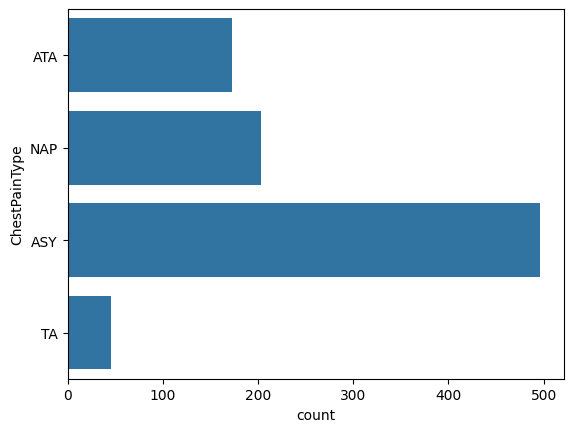

In [51]:
sns.countplot(df['ChestPainType'])

<Axes: xlabel='count', ylabel='ST_Slope'>

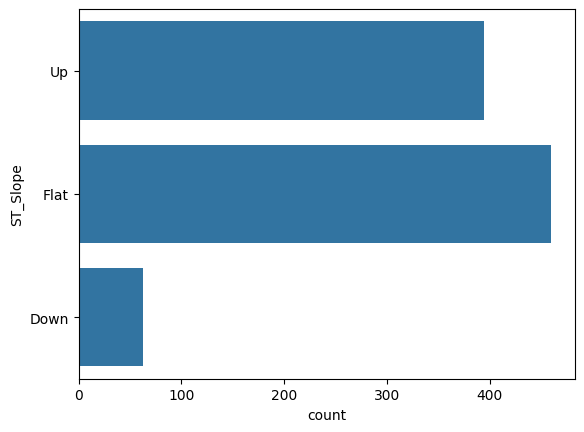

In [52]:
sns.countplot(df['ST_Slope'])

<Axes: xlabel='count', ylabel='RestingECG'>

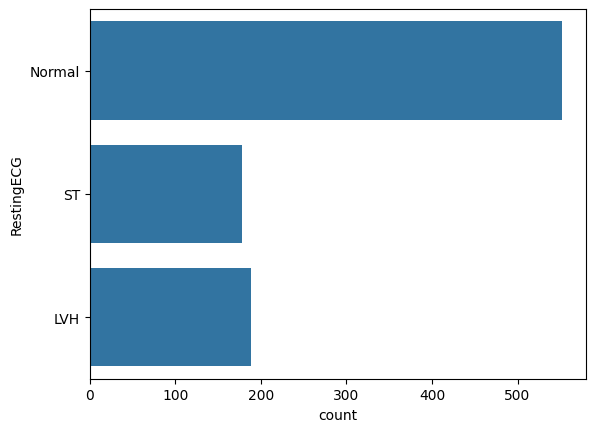

In [53]:
sns.countplot(df['RestingECG'])

<Axes: xlabel='count', ylabel='ExerciseAngina'>

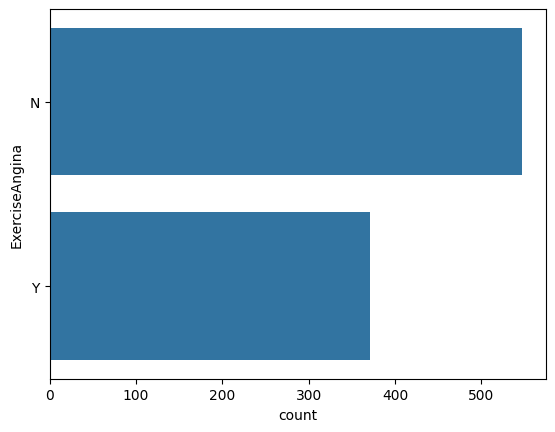

In [54]:
sns.countplot(df['ExerciseAngina'])

<Axes: xlabel='count', ylabel='Sex'>

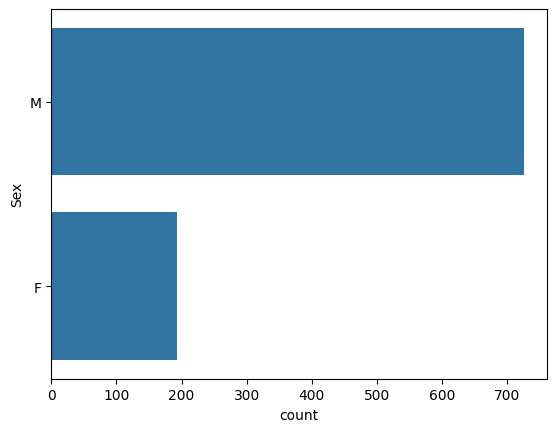

In [55]:
sns.countplot(df['Sex'])

### What this means: 
#### ChestPainType: ASY is the most common.
#### ST_Slope: Flat and Up are in the same range.
#### Resting ECG: Normal is the most common.
#### ExerciseAngina: N and Y are in the same range.
#### Sex: Male is more common.

### Numerical Values

df.hist(figsize=(12,8), bins = 50, edgecolor="black")
plt.show()

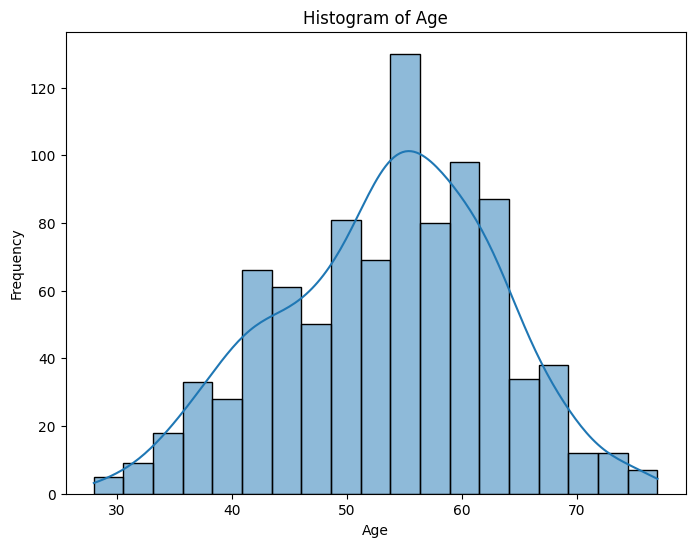

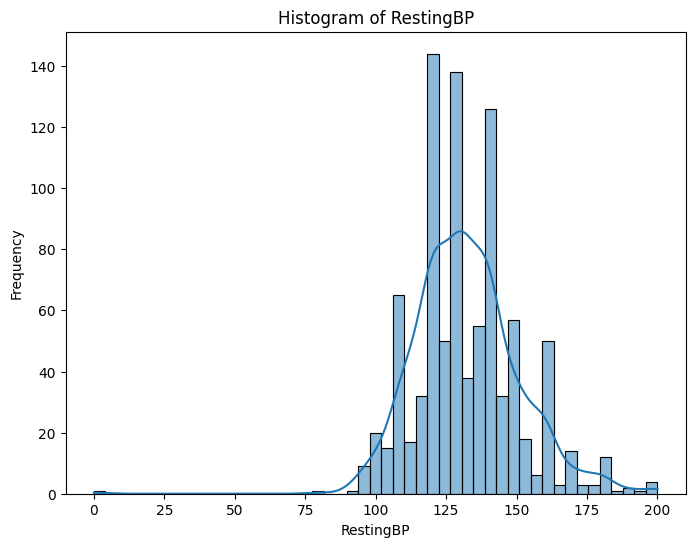

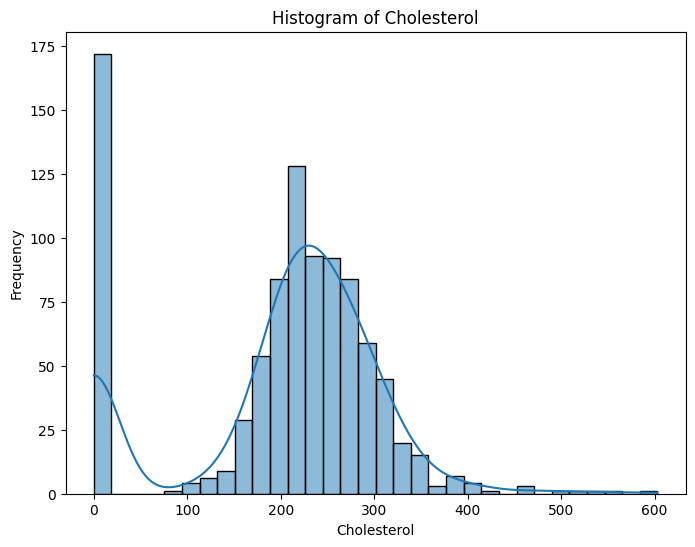

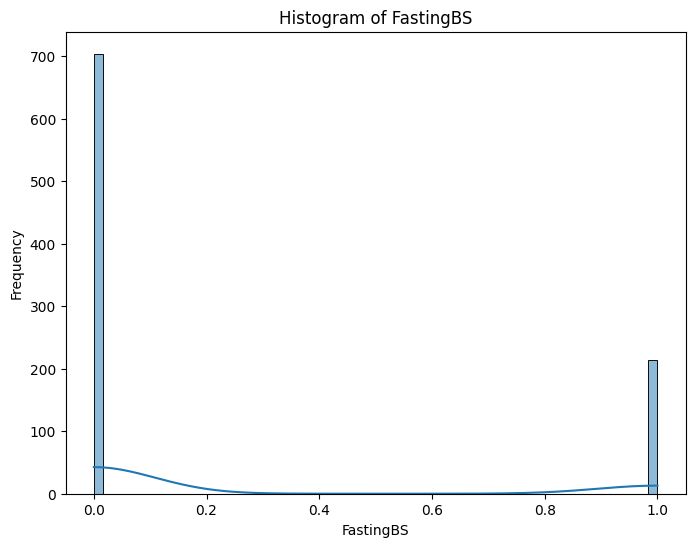

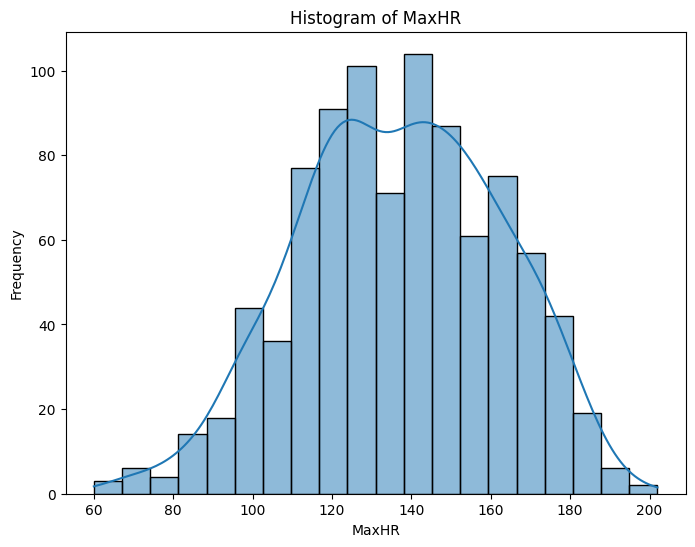

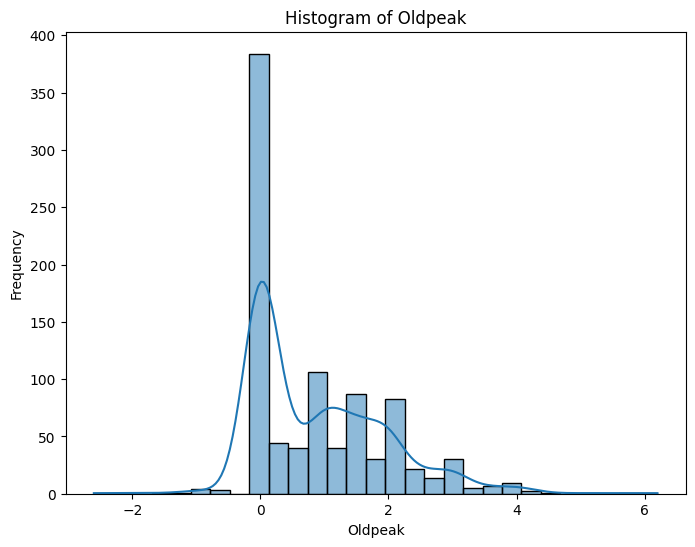

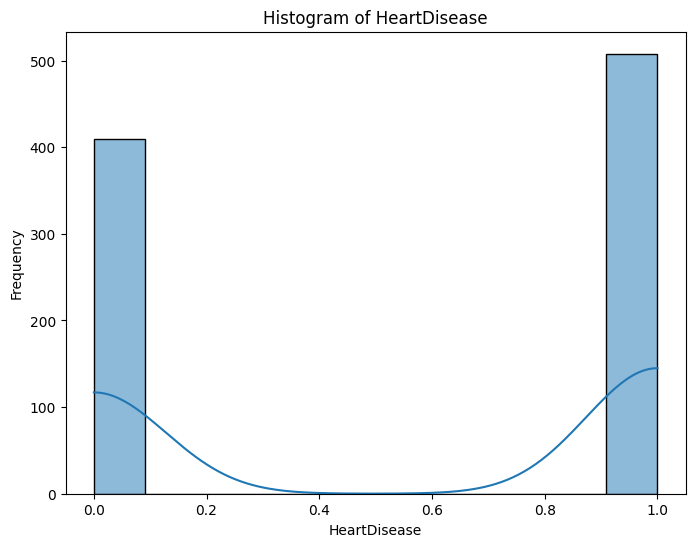

In [56]:
numerical_df = df.select_dtypes(include=np.number)
for column in numerical_df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(numerical_df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### What this means
#### Age: Most patients are in the age of 45 - 75.
#### RestingBP: Most around 120 - 150 mmHg, and some zero values; which are impossible.
#### Cholesterol: Wide range but mainly around 200 - 300, with a lot of zero values; which are impossible.
#### MaxHR: Wide range but mainly 115 - 165 bpm
#### Oldpeak: Range of 0 - 2 but a huge number of zeros.

## Data Imputation
#### Replacing values that are zero with 

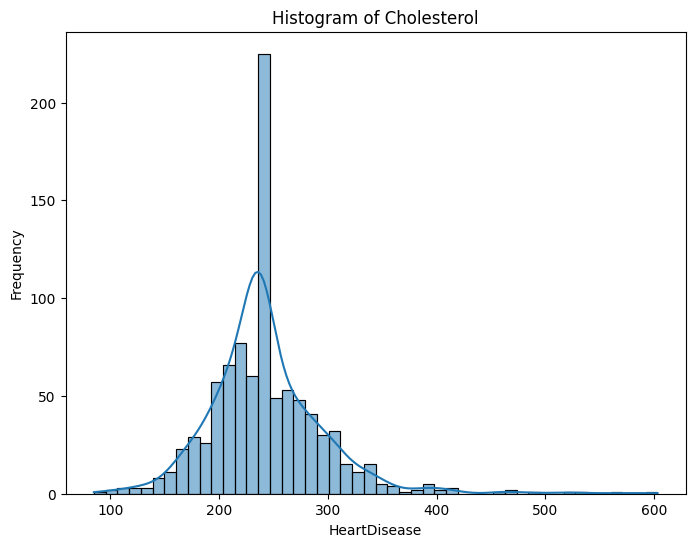

In [75]:
from sklearn.impute import SimpleImputer

df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
# Impute numerical columns with the median
num_imputer = SimpleImputer(strategy='median')
df[['Cholesterol']] = num_imputer.fit_transform(df[['Cholesterol']])
plt.figure(figsize=(8, 6))
sns.histplot(df['Cholesterol'], kde=True)
plt.title(f'Histogram of Cholesterol')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

## EDA using Bivariate Analysis

### Features Vs Target

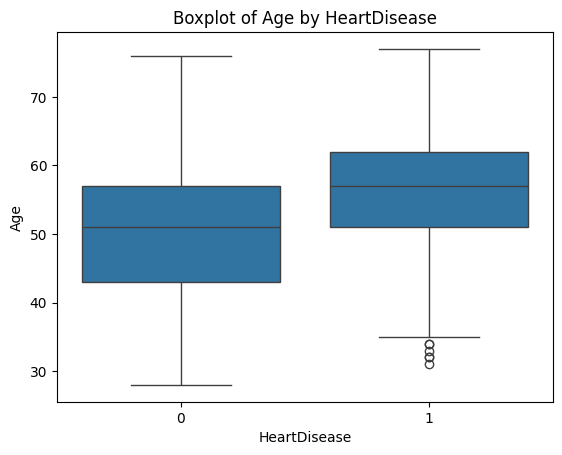

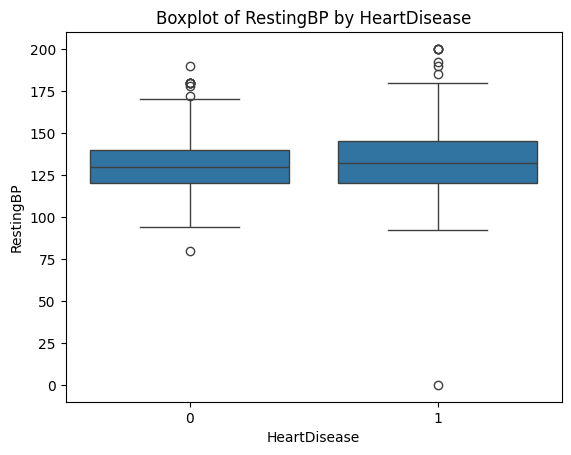

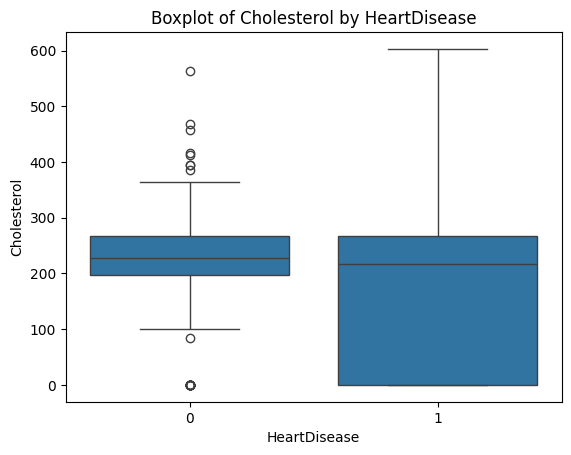

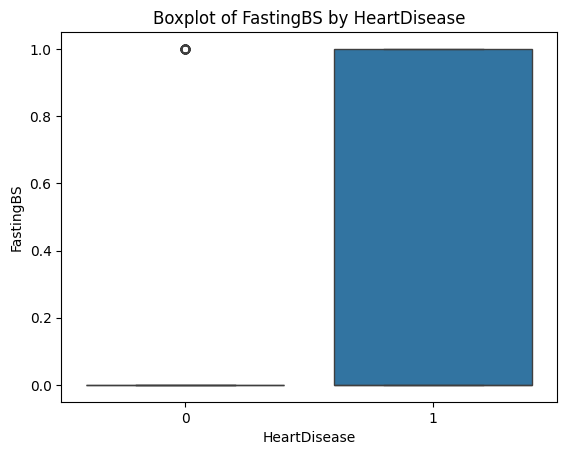

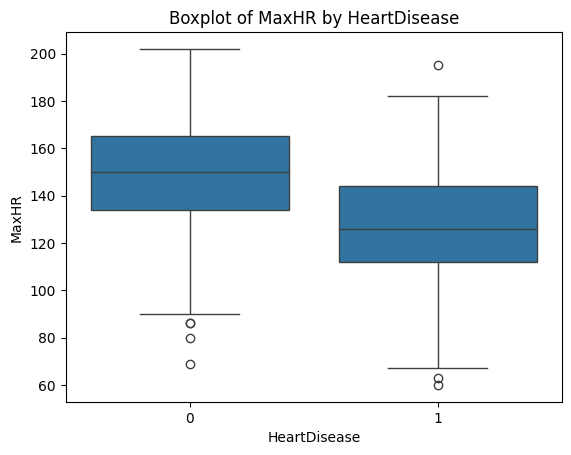

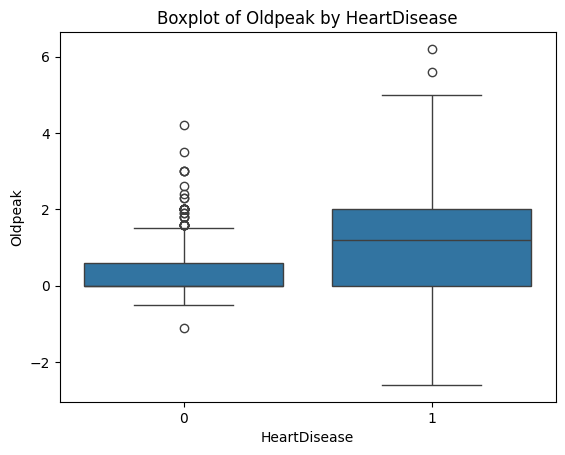

In [57]:
numerical_df2 = numerical_df.copy()
numerical_df2 = numerical_df2.drop('HeartDisease', axis=1)
for column in numerical_df2:
    plt.figure()
    sns.boxplot(data=df, y= f'{column}', x='HeartDisease')
    plt.title(f'Boxplot of {column} by HeartDisease')
    plt.show()

### What this means vs HeartDisease: 
#### Age: Age is slightly higher for patients with disease, with a few outliers. Since there is a slight overlap, it is a decent predictor.
#### RestingBP: Medians are almost same and huge overlap; Not a good predictor.
#### Cholesterol: Medians are almost same, but huge overlap, with a huge number of outliers with disease.
#### FastingBS: FastingBS is binary, so need to plot countplot.
#### MaxHR: Median of disease group is lesser, and there is not a lot of overlap, this means low MaxHR is linked with HeartDisease.
#### Oldpeak: Median of disease group is higher and there is not a lot of overlap, this means Oldpeak is a strong predictor.

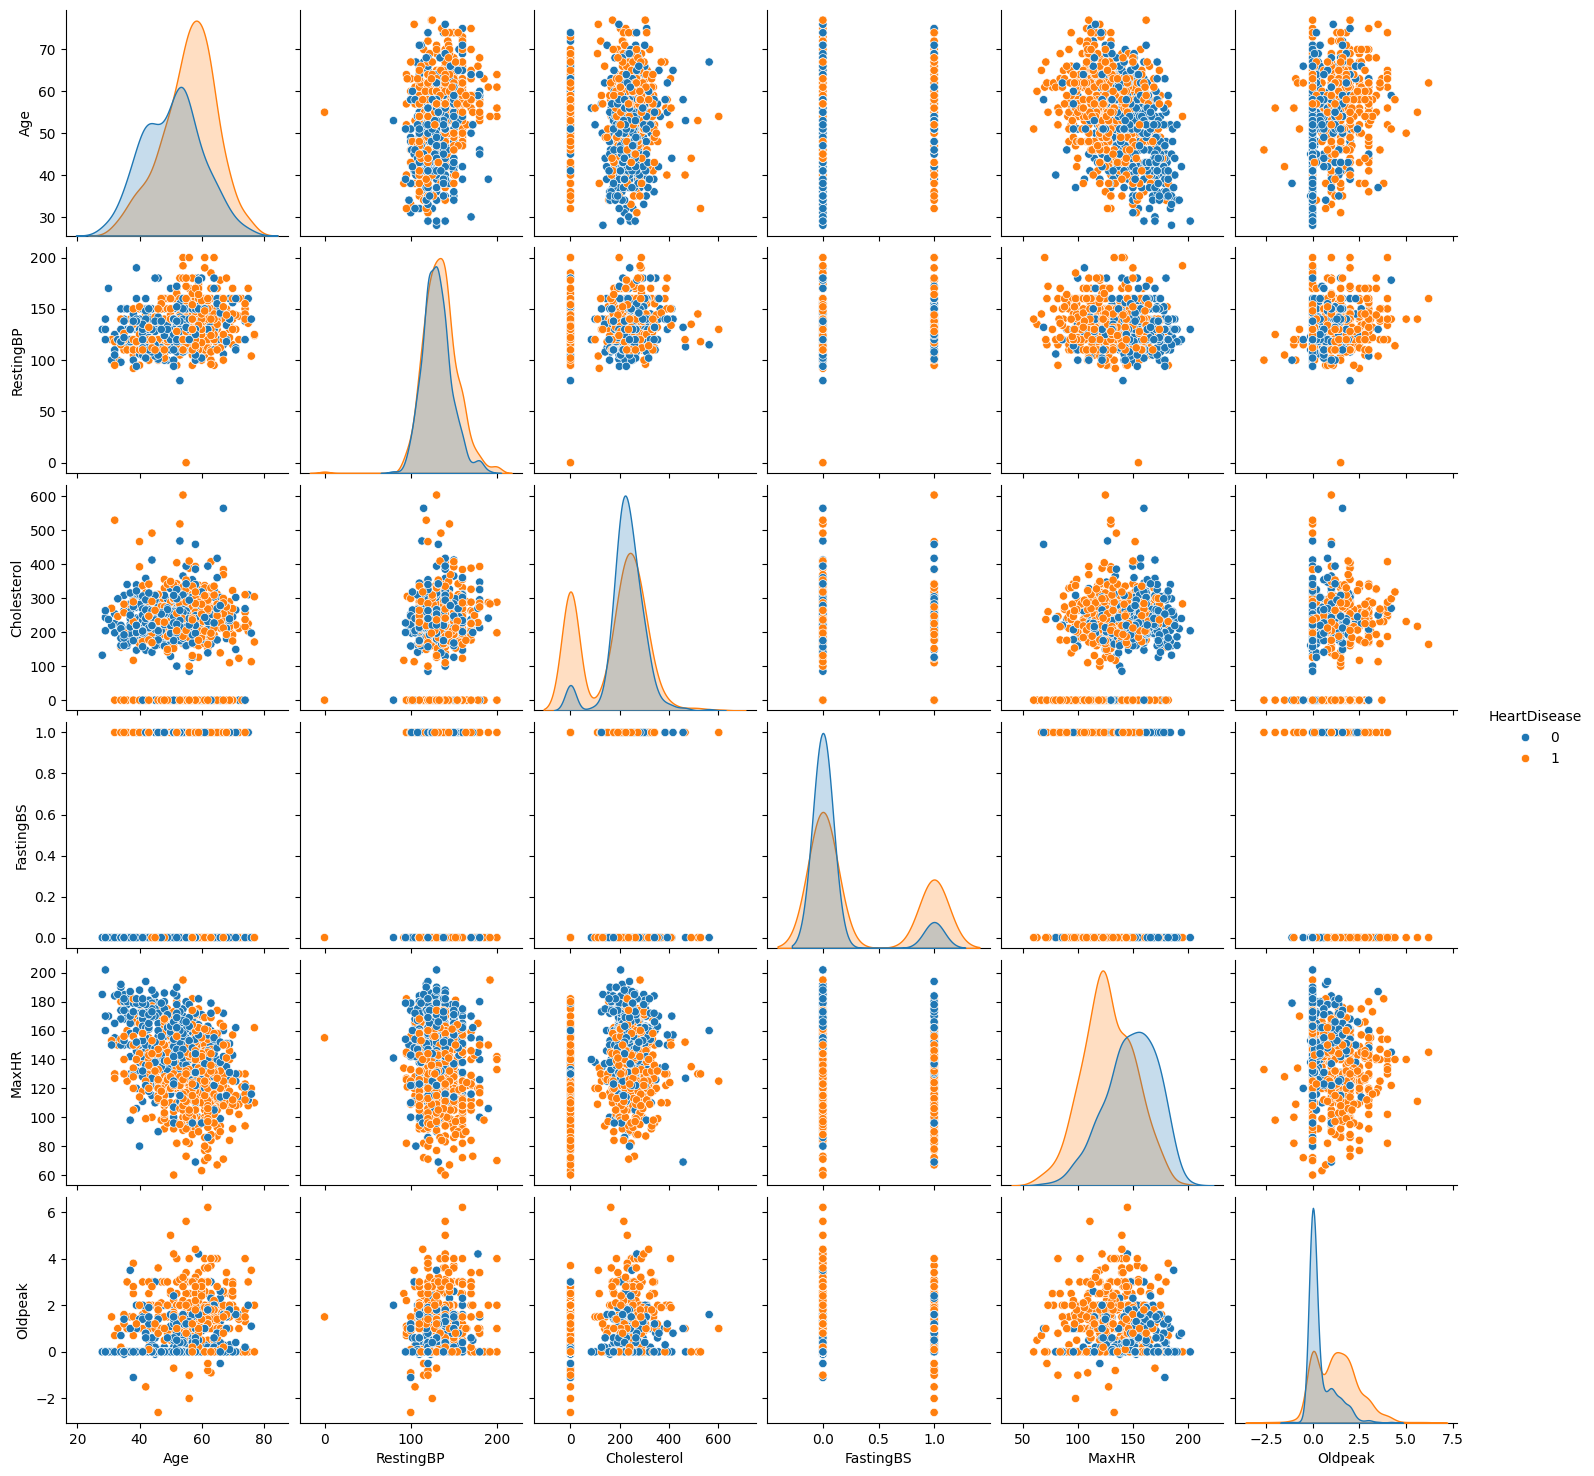

In [58]:
sns.pairplot(data=df, hue='HeartDisease')
plt.show()

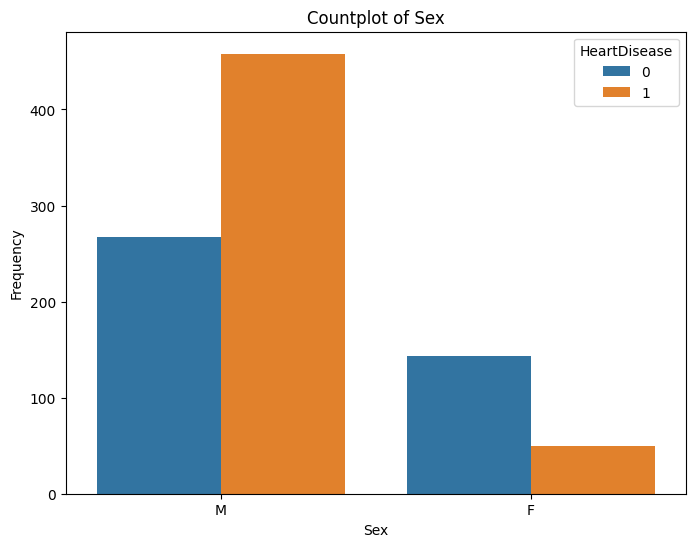

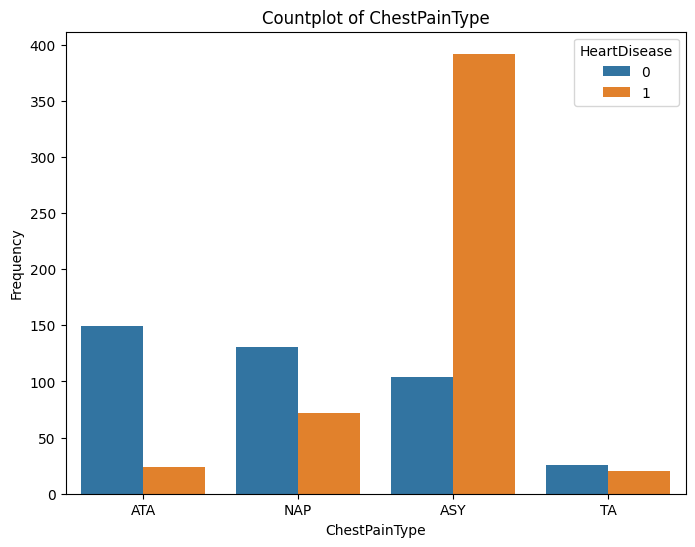

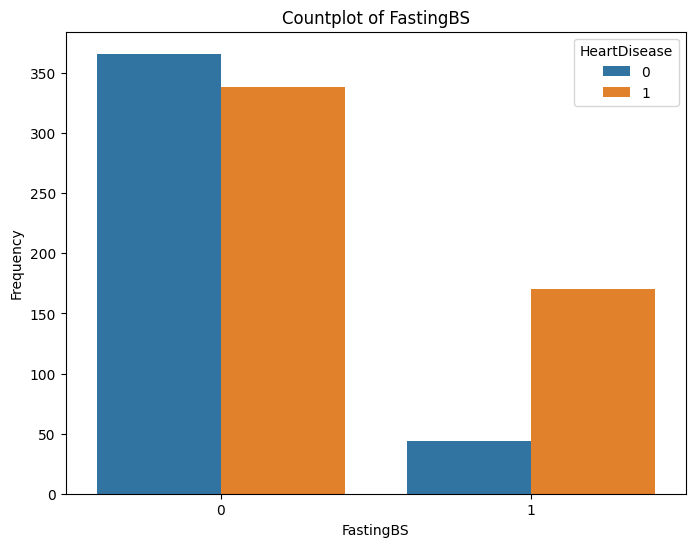

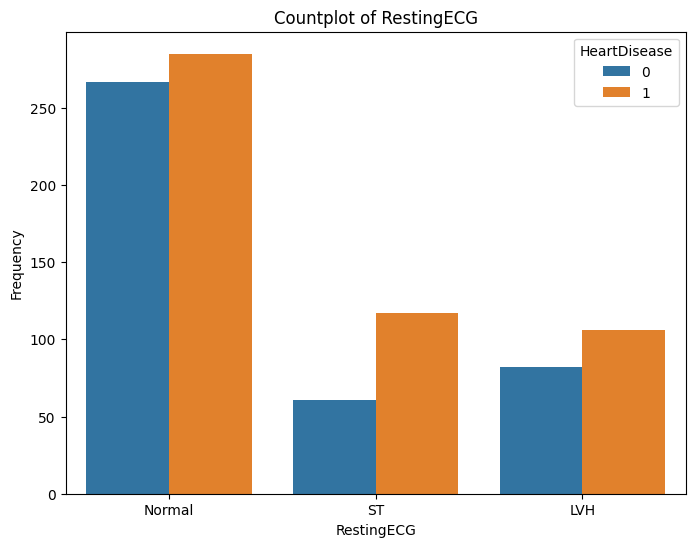

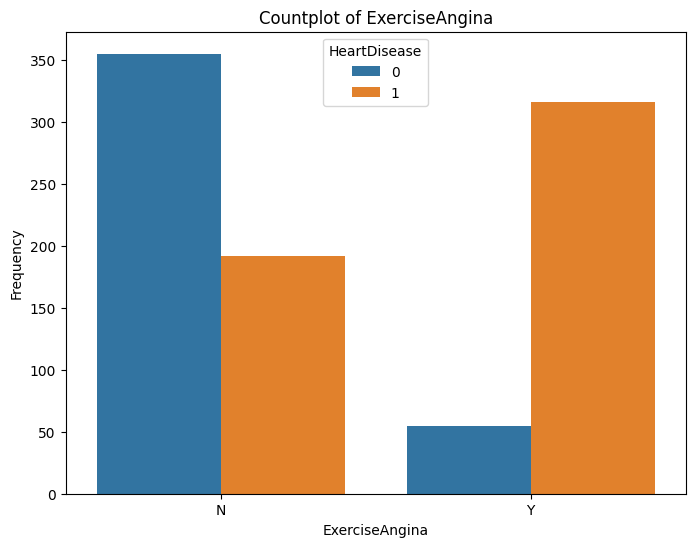

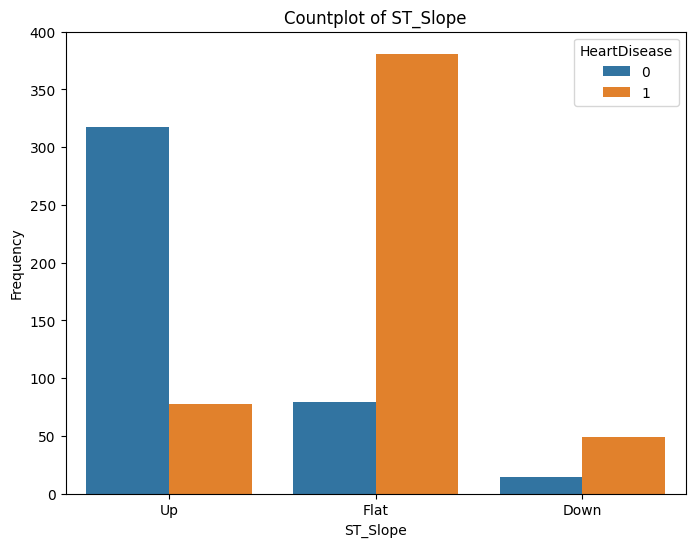

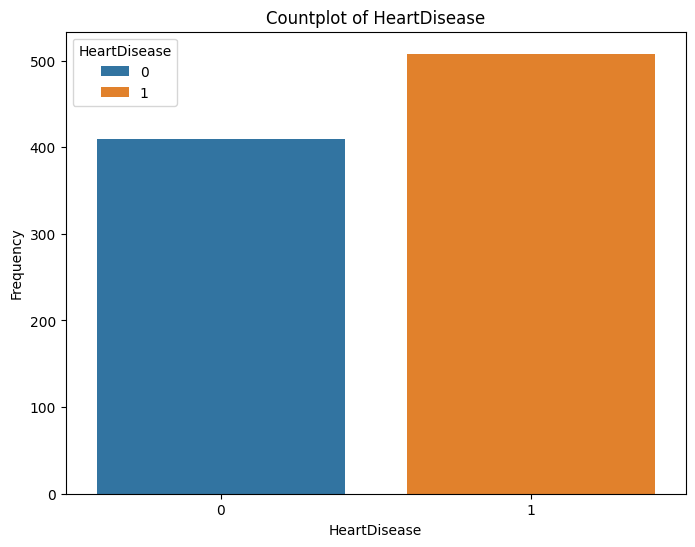

In [59]:
cat_df = df.drop(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], axis=1)
for column in cat_df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=cat_df, x=f'{column}', hue='HeartDisease')
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### What this means:
#### Sex: Men are more likely to have Heart Disease.
#### ChestPainType: ASY is strongly associated with HeartDisease.
#### FastingBS: >120 is linked to HeartDisease.
#### RestingECG: All have similar ranges between disease prone and healthy except ST.
#### ExerciseAngina: People with it are more prone to HeartDisease.
#### ST_Slope: Flat ST_Slope is linked with HeartDisease.

# 

## Encoding Categorical Values

In [60]:
cat_df

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,M,ATA,0,Normal,N,Up,0
1,F,NAP,0,Normal,N,Flat,1
2,M,ATA,0,ST,N,Up,0
3,F,ASY,0,Normal,Y,Flat,1
4,M,NAP,0,Normal,N,Up,0
...,...,...,...,...,...,...,...
913,M,TA,0,Normal,N,Flat,1
914,M,ASY,1,Normal,N,Flat,1
915,M,ASY,0,Normal,Y,Flat,1
916,F,ATA,0,LVH,N,Flat,1


In [61]:
from sklearn.preprocessing import OrdinalEncoder
df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina'], drop_first=True)
st_slope_order = ['Down', 'Flat', 'Up']
ordinal_encoder = OrdinalEncoder(categories=[st_slope_order])
df_encoded['ST_Slope_encoded'] = ordinal_encoder.fit_transform(df_encoded[['ST_Slope']])
df_encoded = df_encoded.drop('ST_Slope', axis=1)
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_encoded
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,2.0
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,1.0
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,2.0
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,1.0
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,2.0


## Correlation Matrix

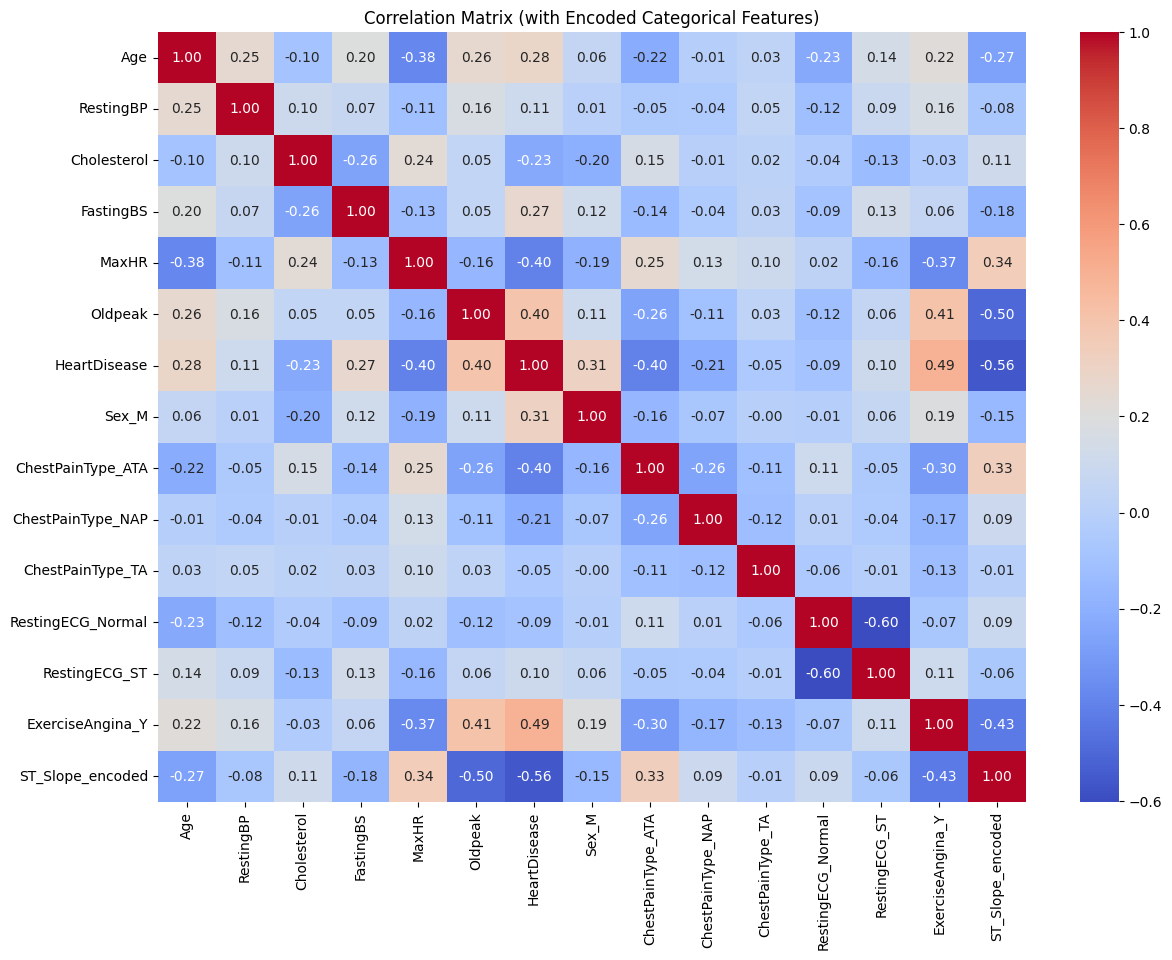

In [62]:
corr_matrix = df_encoded.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, fmt='.2f')
plt.title("Correlation Matrix (with Encoded Categorical Features)")
plt.show()

### What this means: 
#### MaxHR has good negative correlation.
#### Oldpeak has good positive correlation.
#### ChestPainType_ATA has good negative correlation.
#### ExerciseAngina_Y has a strong positive correlation.
#### ST_Slope_Flat has a strong positive correlation.
#### ST_Slope_Up has a strong negative correlation.

#### Dropping RestingECG and RestingBP

In [63]:
df_encoded = df_encoded.drop(['RestingECG_Normal', 'RestingECG_ST', 'RestingBP'], axis=1)

In [64]:
df_encoded.head()

,Age,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_encoded
0,40,289,0,172,0.0,0,True,True,False,False,False,2.0
1,49,180,0,156,1.0,1,False,False,True,False,False,1.0
2,37,283,0,98,0.0,0,True,True,False,False,False,2.0
3,48,214,0,108,1.5,1,False,False,False,False,True,1.0
4,54,195,0,122,0.0,0,True,False,True,False,False,2.0


## Model Training


### Since our target is a binary feature, i'm gonna use a classification algorithm.

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

#### Train Test Split

In [72]:
y = df_encoded["HeartDisease"]
x = df_encoded.drop('HeartDisease', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

#### Feature Scaling

In [73]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### Train

In [74]:
models = {
    "Logistic Regression": LogisticRegression(random_state = 42),
    "Support Vector Machine": SVC(random_state = 42),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state = 42)
}
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    
    print(f"--- {name} Results ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 40 + "\n")
    

--- Logistic Regression Results ---
Accuracy: 0.8641

Confusion Matrix:
[[67 15]
 [10 92]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        82
           1       0.86      0.90      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

----------------------------------------

--- Support Vector Machine Results ---
Accuracy: 0.8804

Confusion Matrix:
[[67 15]
 [ 7 95]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        82
           1       0.86      0.93      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184

----------------------------------------

--- K Nearest Neighbors Resul

## Conclusion
### Based on these results, Random Forest is the best performing model for this dataset.
### It has highest accuracy (88.59%) and highest f1 score (0.89).
### It also has the least False negatives, which is crucial for medical diagnosis